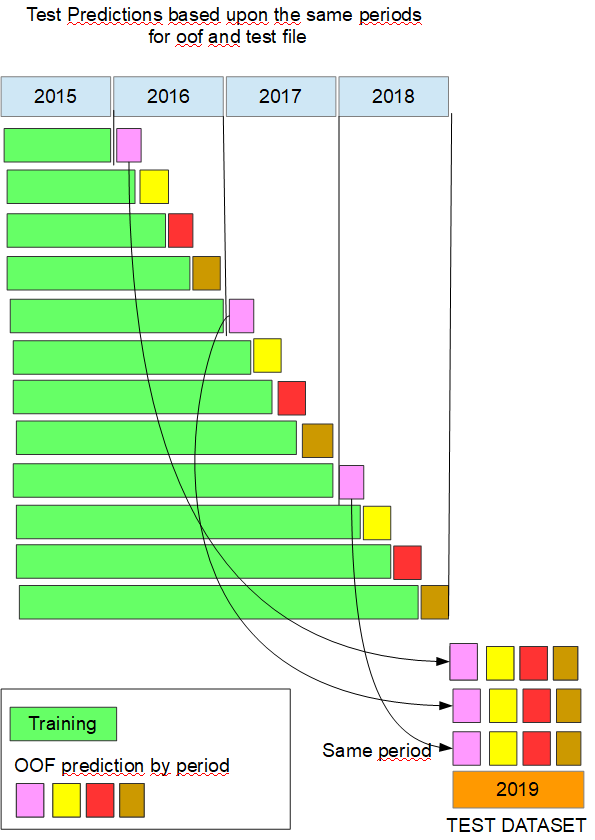

In [ ]:
import numpy as np 
import pandas as pd 
pd.options.display.max_columns = 20
import os
from sklearn.metrics import mean_squared_error
from catboost import CatBoostRegressor
from colorama import Fore, Back, Style
import seaborn as sns
import plotly.express as px
import matplotlib
from matplotlib.patches import Patch
from matplotlib import pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
plt.style.use('fivethirtyeight')
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train = pd.read_csv('../input/tabular-playground-series-jan-2022/train.csv')
test = pd.read_csv('../input/tabular-playground-series-jan-2022/test.csv')

<h2> Transform data to timeserie with unique dates

In [ ]:
target=pd.DataFrame()

#Mug Fin Mart : Mug sold in Finland by KaggleMart
#Mug hat Mart : Hat sold in Finland by KaggleMart
#Mug sti Mart : Sitcker sold in Finland by KaggleMart...

# FINLAND :
target['Mug Fin Mart'] = train[((((train['product'] == 'Kaggle Mug') & (train['country']=='Finland'))==True) & (train['store']=='KaggleMart')==True)].groupby('date').sum()['num_sold']
target['Hat Fin Mart'] = train[((((train['product'] == 'Kaggle Hat') & (train['country']=='Finland'))==True) & (train['store']=='KaggleMart')==True)].groupby('date').sum()['num_sold']
target['Sti Fin Mart'] = train[((((train['product'] == 'Kaggle Sticker') & (train['country']=='Finland'))==True) & (train['store']=='KaggleMart')==True)].groupby('date').sum()['num_sold']
target['Mug Fin Rama'] = train[((((train['product'] == 'Kaggle Mug') & (train['country']=='Finland'))==True) & (train['store']=='KaggleRama')==True)].groupby('date').sum()['num_sold']
target['Hat Fin Rama'] = train[((((train['product'] == 'Kaggle Hat') & (train['country']=='Finland'))==True) & (train['store']=='KaggleRama')==True)].groupby('date').sum()['num_sold']
target['Sti Fin Rama'] = train[((((train['product'] == 'Kaggle Sticker') & (train['country']=='Finland'))==True) & (train['store']=='KaggleRama')==True)].groupby('date').sum()['num_sold']

# NORWAY:
target['Mug Nor Mart'] = train[((((train['product'] == 'Kaggle Mug') & (train['country']=='Norway'))==True) & (train['store']=='KaggleMart')==True)].groupby('date').sum()['num_sold']
target['Hat Nor Mart'] = train[((((train['product'] == 'Kaggle Hat') & (train['country']=='Norway'))==True) & (train['store']=='KaggleMart')==True)].groupby('date').sum()['num_sold']
target['Sti Nor Mart'] = train[((((train['product'] == 'Kaggle Sticker') & (train['country']=='Norway'))==True) & (train['store']=='KaggleMart')==True)].groupby('date').sum()['num_sold']
target['Mug Nor Rama'] = train[((((train['product'] == 'Kaggle Mug') & (train['country']=='Norway'))==True) & (train['store']=='KaggleRama')==True)].groupby('date').sum()['num_sold']
target['Hat Nor Rama'] = train[((((train['product'] == 'Kaggle Hat') & (train['country']=='Norway'))==True) & (train['store']=='KaggleRama')==True)].groupby('date').sum()['num_sold']
target['Sti Nor Rama'] = train[((((train['product'] == 'Kaggle Sticker') & (train['country']=='Norway'))==True) & (train['store']=='KaggleRama')==True)].groupby('date').sum()['num_sold']

# SWEDEN:
target['Mug Swe Mart'] = train[((((train['product'] == 'Kaggle Mug') & (train['country']=='Sweden'))==True) & (train['store']=='KaggleMart')==True)].groupby('date').sum()['num_sold']
target['Hat Swe Mart'] = train[((((train['product'] == 'Kaggle Hat') & (train['country']=='Sweden'))==True) & (train['store']=='KaggleMart')==True)].groupby('date').sum()['num_sold']
target['Sti Swe Mart'] = train[((((train['product'] == 'Kaggle Sticker') & (train['country']=='Sweden'))==True) & (train['store']=='KaggleMart')==True)].groupby('date').sum()['num_sold']
target['Mug Swe Rama'] = train[((((train['product'] == 'Kaggle Mug') & (train['country']=='Sweden'))==True) & (train['store']=='KaggleRama')==True)].groupby('date').sum()['num_sold']
target['Hat Swe Rama'] = train[((((train['product'] == 'Kaggle Hat') & (train['country']=='Sweden'))==True) & (train['store']=='KaggleRama')==True)].groupby('date').sum()['num_sold']
target['Sti Swe Rama'] = train[((((train['product'] == 'Kaggle Sticker') & (train['country']=='Sweden'))==True) & (train['store']=='KaggleRama')==True)].groupby('date').sum()['num_sold']

target.index = np.arange(0,target.shape[0],1).tolist()
target.head(3)

<h2> Data Engineering

In [ ]:
train_data = pd.DataFrame()
train_data['date'] = np.unique(train['date']).tolist()
train_data['date'] = pd.to_datetime(train_data['date'])
train_data['year'] = train_data['date'].dt.year
train_data['month'] = train_data['date'].dt.month
train_data['day'] = train_data['date'].dt.day
train_data['dayofweek'] = train_data['date'].dt.dayofweek
train_data['dayofmonth'] = train_data['date'].dt.days_in_month
train_data['dayofyear'] = train_data['date'].dt.dayofyear
train_data['weekday'] = train_data['date'].dt.weekday

test_data = pd.DataFrame()
test_data['date'] = np.unique(test['date']).tolist()
test_data['date'] = pd.to_datetime(test_data['date'])
test_data['year'] = test_data['date'].dt.year
test_data['month'] = test_data['date'].dt.month
test_data['day'] = test_data['date'].dt.day
test_data['dayofweek'] = test_data['date'].dt.dayofweek
test_data['dayofmonth'] = test_data['date'].dt.days_in_month
test_data['dayofyear'] = test_data['date'].dt.dayofyear
test_data['weekday'] = test_data['date'].dt.weekday

train_data.drop('date', axis = 1, inplace = True)
test_data.drop('date', axis = 1, inplace = True)
train_data.shape,test_data.shape

In [ ]:
test_pred_cumul = np.zeros((test_data.shape[0],18))

def training(index_valid_start,index_valid_end,index_test_start,index_test_end): 
    
    X_train, y_train = train_data.iloc[0:index_valid_start], target.iloc[0:index_valid_start]
    X_valid, y_valid = train_data.iloc[index_valid_start:index_valid_end], target.iloc[index_valid_start:index_valid_end]
    
    param1 = {   
        'learning_rate': 0.004280047845210125, 
        'depth': 5, 
        'l2_leaf_reg': 0.0010555278350981901, 
        'loss_function': 'MultiRMSE', 
        'eval_metric': 'MultiRMSE', 
        'task_type': 'CPU', 
        'iterations':16962
        }
    
    clf = CatBoostRegressor(**param1)
    clf.fit(
                X_train, y_train,
                eval_set=[(X_valid,y_valid)],
                early_stopping_rounds = 1000,
                verbose=0)
    pred=clf.predict(X_valid)
    
    score = np.round(mean_squared_error(y_valid,pred))
    print("fold",i+1,"score MSE =",score,"RMSE =",np.round(np.sqrt(score)))
    
    pred_test = clf.predict(test_data.loc[index_test_start:index_test_end-1])
    
    global test_pred_cumul
    test_pred_cumul[index_test_start:index_test_end] += pred_test/3

<h2> We make predictions with the same period for train and test with the splitting tool :

We start training based upon 2015. We split 2016, 2017, 2018 into 30 sets of 36 days
The training set increases at each fold of 36 days as well.
Please see the picture in first cell for more explanations :-)

In [ ]:
index_train_start = 0
index_train_end = 0
index_valid_end = 0

for i in range(30):
    print("\n---------------- FOLD ",i,"--------------")
    if i == 9 :
        index_train_start = 0
        index_train_end = 365 + 36 * i
        index_valid_start = index_train_end
        index_valid_end = 365 + 36 * (i + 1) 
        index_test_start = 36 * 9
        index_test_end = 36 * (9 + 1)+5
        training(index_valid_start,index_valid_end,index_test_start,index_test_end)
    else :
        if i == 19 :
            index_train_start = 0
            index_train_end = 365 + 36 * i
            index_valid_start = index_train_end
            index_valid_end = 365 + 36 * (i + 1)+5 
            index_test_start = 36 * 9
            index_test_end = 36 * (9 + 1)+5        
            training(index_valid_start,index_valid_end,index_test_start,index_test_end)
        else :
            if i == 29 :
                index_train_start = 0
                index_train_end = 365 + 36 * i
                index_valid_start = index_train_end
                index_valid_end = 365 + 36 * (i + 1)+15         
                index_test_start = 36 * 9
                index_test_end = 36 * (9 + 1) + 5 
                training(index_valid_start,index_valid_end,index_test_start,index_test_end)
            else :
                if i<9 :
                    index_train_start = 0
                    index_train_end = 365 + 36 * i
                    index_valid_start = index_train_end
                    index_valid_end = 365 + 36 * (i + 1) 
                    index_test_start = 36 * i
                    index_test_end = 36 * (i + 1) 
                    training(index_valid_start,index_valid_end,index_test_start,index_test_end)
                else:
                    if i<19 :
                        index_train_start = 0
                        index_train_end = 365 + 36 * i
                        index_valid_start = index_train_end
                        index_valid_end = 365 + 36 * (i + 1) 
                        index_test_start = 36 * (i-10)
                        index_test_end = 36 * ((i-10) + 1) 
                        training(index_valid_start,index_valid_end,index_test_start,index_test_end)
                    else :
                        index_train_start = 0
                        index_train_end = 365 + 36 * i
                        index_valid_start = index_train_end
                        index_valid_end = 365 + 36 * (i + 1) 
                        index_test_start = 36 * (i-20)
                        index_test_end = 36 * ((i-20) + 1) 
                        training(index_valid_start,index_valid_end,index_test_start,index_test_end)                      

In [ ]:
sub = pd.read_csv('../input/tabular-playground-series-jan-2022/sample_submission.csv')

def make_submission(df):
    submission = pd.DataFrame(data=np.zeros((sub.shape[0],2)),index = sub.index.tolist(),columns=['row_id','num_sold'])
    INDEX = -1
    for i in range(365):
        for j in range (18) :
            INDEX +=1
            submission['num_sold'].loc[INDEX,1]=df.iloc[i,j]
    submission['row_id'] = sub['row_id']
    return submission

In [ ]:
pred_test_df = pd.DataFrame(test_pred_cumul,columns=target.columns.tolist()) 
sub_1 = make_submission(pred_test_df)

<h2> Help from the community !

In [ ]:
public_submission = pd.read_csv('../input/tps-2022-01/public_submission.csv')
submission_bonus=sub.copy()
sub_1['num_sold'] = (sub_1['num_sold']+public_submission['num_sold'])/2

In [ ]:
sub_1.to_csv("sub_1.csv",index = False)
pd.read_csv('sub_1.csv')